In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


**TRAIN DATASET**

In [2]:
train=pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Finding the NULL values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Percentage of NULL values in train data set
train.isnull().sum()*100/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
#Finding the duplicate rows in the train dataset
duplicate_rows_train=train[train.duplicated()]
duplicate_rows_train.shape

(0, 12)

In [9]:
#Finding Median of Age
median=train.Age.median()
median

28.0

In [10]:
#Filling Nan values present in Age with median
train['Age']=train['Age'].fillna(median)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#creating cabin_null by cabin if null is ture 1 or 0
train['cabin_null']=np.where(train['Cabin'].isnull(),1,0)

In [12]:
#Removing Unwanted Columns
train=train.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [13]:
#Droping Nan rows in Embarked
train.dropna(axis=0,how='any',inplace=True)

In [14]:
train.shape

(889, 9)

In [15]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
cabin_null    0
dtype: int64

In [17]:
#No.of Unique values in train dataset
train.nunique()

Survived        2
Pclass          3
Sex             2
Age            88
SibSp           7
Parch           7
Fare          247
Embarked        3
cabin_null      2
dtype: int64

In [18]:
train['Age'].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
train['Age']=train['Age'].astype(int)

In [20]:
# Classifing Age Groups
def age(df):
    df.loc[train['Age']<=17,'Age']=1                        #Baby and unmatured
    df.loc[(train['Age']>17) & (train['Age']<=39),'Age']=2   #Young Age Adult
    df.loc[(train['Age']>39) & (train['Age']<=59),'Age']=3    #Middle Age Adult
    df.loc[(train['Age']>59),'Age']=4                    #Old Adult
    return df
age(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_null
0,0,3,male,2,1,0,7.2500,S,1
1,1,1,female,2,1,0,71.2833,C,0
2,1,3,female,2,0,0,7.9250,S,1
3,1,1,female,2,1,0,53.1000,S,0
4,0,3,male,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,2,0,0,13.0000,S,1
887,1,1,female,2,0,0,30.0000,S,0
888,0,3,female,2,1,2,23.4500,S,1
889,1,1,male,2,0,0,30.0000,C,0


In [21]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'cabin_null'],
      dtype='object')

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    object 
 1   Pclass      889 non-null    object 
 2   Sex         889 non-null    object 
 3   Age         889 non-null    object 
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    object 
 8   cabin_null  889 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 69.5+ KB


In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train["Sex"]=labelencoder.fit_transform(train['Sex'])
train['Embarked']=labelencoder.fit_transform(train['Embarked'])

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    object 
 1   Pclass      889 non-null    object 
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    object 
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    int64  
 8   cabin_null  889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 69.5+ KB


In [60]:
columns_to_convert=['Survived', 'Pclass', 'Sex', 'Age','Embarked', 'cabin_null']
for i in columns_to_convert:
    train[i]=train[i].astype(str)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    object 
 1   Pclass      889 non-null    object 
 2   Sex         889 non-null    object 
 3   Age         889 non-null    object 
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    object 
 8   cabin_null  889 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 69.5+ KB


In [58]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_null
0,0,3,1,2,1,0,7.2500,2,1
1,1,1,0,2,1,0,71.2833,0,0
2,1,3,0,2,0,0,7.9250,2,1
3,1,1,0,2,1,0,53.1000,2,0
4,0,3,1,2,0,0,8.0500,2,1


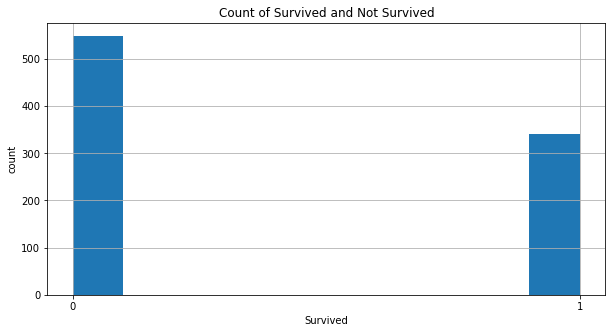

In [27]:
#Histogram Plot for Survived Peolpe
train['Survived'].hist(figsize=(10,5))
plt.title("Count of Survived and Not Survived")
plt.xlabel('Survived')
plt.ylabel('count')
plt.show()

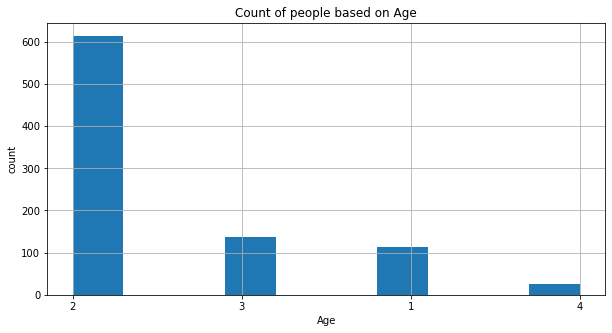

In [28]:
#Histogram of Age 
train['Age'].hist(figsize=(10,5))
plt.title("Count of people based on Age")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [29]:
#Crosstab for no.of people Survived based on Age 
Age_survived=pd.crosstab(train.Age,train.Survived,normalize='index').round(4)*100
Age_survived

Survived,0,1
Age,,
1,46.02,53.98
2,64.33,35.67
3,60.58,39.42
4,76.00,24.00


<Figure size 1080x576 with 0 Axes>

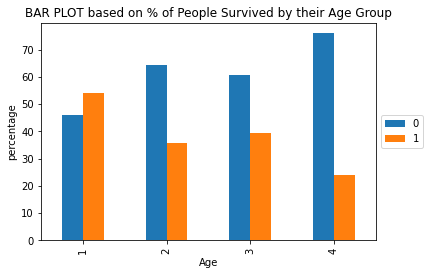

In [30]:
#graph for Survived by Age
plt.figure(figsize=(15,8))
Age_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Age Group")
plt.ylabel('percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


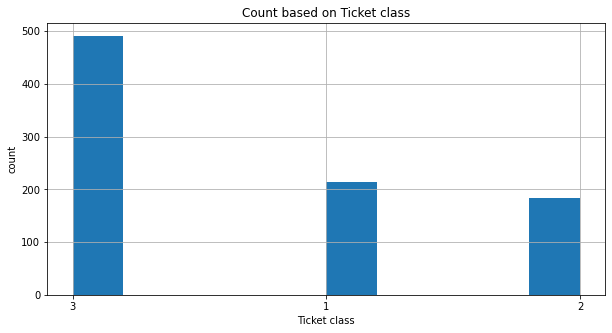

In [31]:
#Histogram for Ticket class 
train['Pclass'].hist(figsize=(10,5))
plt.title("Count based on Ticket class")
plt.xlabel('Ticket class')
plt.ylabel('count')
plt.show()

In [32]:
#Crosstab for no.of people Survived based on Ticket Class 
Class_survived=pd.crosstab(train.Pclass,train.Survived,normalize='index').round(4)*100
Class_survived

Survived,0,1
Pclass,,
1,37.38,62.62
2,52.72,47.28
3,75.76,24.24


<Figure size 720x360 with 0 Axes>

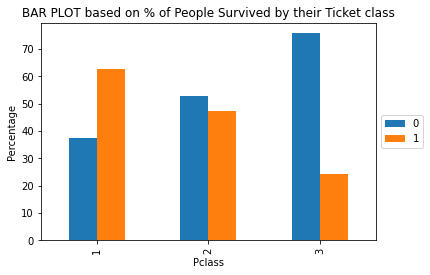

In [33]:
#graph for Survived by Ticket Class
plt.figure(figsize=(10,5))
Class_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Ticket class")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

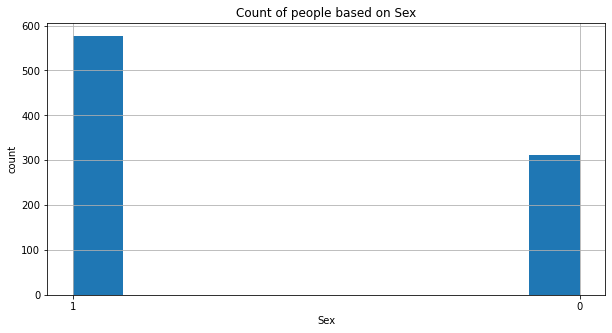

In [63]:
#Histogram of Age 
train['Sex'].hist(figsize=(10,5))
plt.title("Count of people based on Sex")
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

In [39]:
#Crosstab for no.of people Survived based on Sex 
Sex_survived=pd.crosstab(train.Sex,train.Survived,normalize='index').round(4)*100
Sex_survived

Survived,0,1
Sex,,
0,25.96,74.04
1,81.11,18.89


<Figure size 720x360 with 0 Axes>

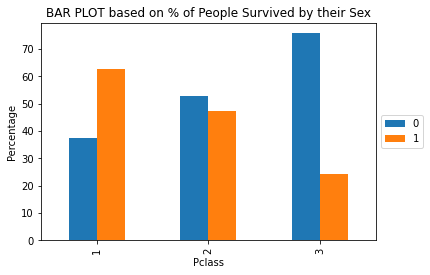

In [40]:
#graph for Survived by Ticket Class
plt.figure(figsize=(10,5))
Class_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Sex")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

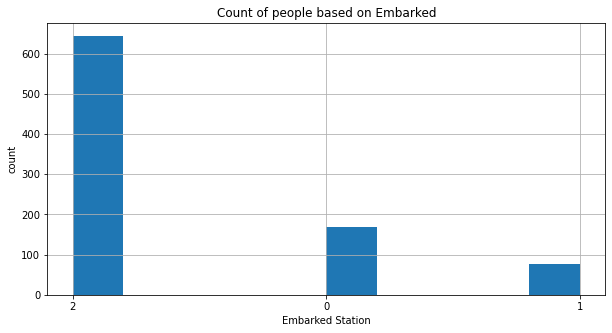

In [64]:
#Histogram of Age 
train['Embarked'].hist(figsize=(10,5))
plt.title("Count of people based on Embarked")
plt.xlabel('Embarked Station')
plt.ylabel('count')
plt.show()

In [42]:
#Crosstab for no.of people Survived based on Embarked Station 
Embarked_survived=pd.crosstab(train.Embarked,train.Survived,normalize='index').round(4)*100
Embarked_survived

Survived,0,1
Embarked,,
0,44.64,55.36
1,61.04,38.96
2,66.30,33.70


<Figure size 720x360 with 0 Axes>

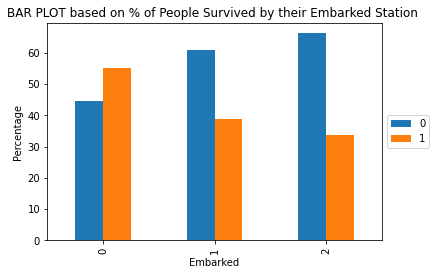

In [43]:
#graph for Survived by Embarked Station 
plt.figure(figsize=(10,5))
Embarked_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Embarked Station ")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [48]:
#checking the each area with Result variable (percentage value)
cabin_null_Survived=pd.crosstab(train.cabin_null,train.Survived,normalize='index').round(4)*100
cabin_null_Survived

Survived,0,1
cabin_null,,
0,33.66,66.34
1,70.01,29.99


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    object 
 1   Pclass      889 non-null    object 
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    object 
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    int64  
 8   cabin_null  889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 69.5+ KB


In [43]:
#correlation : Measures the strength of the linear relationship b/w two variables
train_corr=train.corr()
train_corr

,SibSp,Parch,Fare
SibSp,1.000000,0.414542,0.160887
Parch,0.414542,1.000000,0.217532
Fare,0.160887,0.217532,1.000000


In [45]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'cabin_null'],
      dtype='object')

[**HYPOTHESIS TESTING**](http://)

In [65]:
train1=pd.DataFrame(train,columns=['Survived', 'Pclass', 'Sex', 'Age',
       'Embarked', 'cabin_null'])

In [73]:
columns_to_convert=['Survived', 'Pclass', 'Sex', 'Age','Embarked', 'cabin_null']
for i in columns_to_convert:
    train1[i]=train1[i].astype(int)

In [74]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    889 non-null    int64
 1   Pclass      889 non-null    int64
 2   Sex         889 non-null    int64
 3   Age         889 non-null    int64
 4   Embarked    889 non-null    int64
 5   cabin_null  889 non-null    int64
dtypes: int64(6)
memory usage: 48.6 KB


In [75]:
import scipy.stats as stats
chi2,p,dof,ex=stats.chi2_contingency(train1)
print(p)

1.0


In [76]:
if p<=0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


**TEST DATASET**

In [77]:
test=pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
test.shape

(418, 11)

In [79]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [81]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [82]:
#Percentage of NULL values in test data set
test.isnull().sum()*100/len(test)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [83]:
#Finding the duplicate rows in test dataset 
duplicate_rows_test=test[test.duplicated()]
duplicate_rows_test.shape

(0, 11)

In [85]:
#Finding Median of Age
median=test.Age.median()
median

27.0

In [86]:
#Filling Nan values present in Age with median
test['Age']=test['Age'].fillna(median)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
#creating cabin_null by cabin if null is ture 1 or 0
test['cabin_null']=np.where(test['Cabin'].isnull(),1,0)

In [89]:
#Removing Unwanted Columns
test=test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [90]:
#Droping Nan rows in Embarked
test.dropna(axis=0,how='any',inplace=True)

In [91]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
cabin_null    0
dtype: int64

In [92]:
test['Age'].describe()

count    417.000000
mean      29.525180
std       12.628258
min        0.170000
25%       23.000000
50%       27.000000
75%       35.000000
max       76.000000
Name: Age, dtype: float64

In [93]:
train['Age']=train['Age'].astype(int)

In [95]:
# Classifing Age Groups
def age(df):
    df.loc[test['Age']<=17,'Age']=1                        #Baby and unmatured
    df.loc[(test['Age']>17) & (test['Age']<=39),'Age']=2   #Young Age Adult
    df.loc[(test['Age']>39) & (test['Age']<=59),'Age']=3    #Middle Age Adult
    df.loc[(test['Age']>59),'Age']=4                    #Old Adult
    return df
age(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_null
0,3,male,2.0,0,0,7.8292,Q,1
1,3,female,3.0,1,0,7.0000,S,1
2,2,male,4.0,0,0,9.6875,Q,1
3,3,male,2.0,0,0,8.6625,S,1
4,3,female,2.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,male,2.0,0,0,8.0500,S,1
414,1,female,2.0,0,0,108.9000,C,0
415,3,male,2.0,0,0,7.2500,S,1
416,3,male,2.0,0,0,8.0500,S,1


In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test["Sex"]=labelencoder.fit_transform(test['Sex'])
test['Embarked']=labelencoder.fit_transform(test['Embarked'])

In [98]:
columns_to_convert=[ 'Pclass', 'Sex', 'Age','Embarked', 'cabin_null']
for i in columns_to_convert:
    test[i]=test[i].astype(str)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      417 non-null    object 
 1   Sex         417 non-null    object 
 2   Age         417 non-null    object 
 3   SibSp       417 non-null    int64  
 4   Parch       417 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked    417 non-null    object 
 7   cabin_null  417 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 49.3+ KB


In [100]:
columns_to_convert=['Survived', 'Pclass', 'Sex', 'Age','Embarked', 'cabin_null']
for i in columns_to_convert:
    train[i]=train[i].astype(str)

In [ ]:
train.info()